<a href="https://colab.research.google.com/github/Melanee-Melanee/OCR/blob/main/YOLO_v8_Object_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Train Yolov8 object detection on a custom dataset(Gloves, Helmet, ... detection )


References:

https://www.youtube.com/watch?v=iy34dSwfEsY

https://github.com/entbappy/YOLO-v8-Object-Detection

https://github.com/ultralytics/ultralytics

Annotation tool:

https://www.cvat.ai/

In [ ]:
# to check GPU:

# !nvidia-smi

In [ ]:
# mount this notebook to Goole Drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#if you get UTF-8 error on your Goole colab:

# import locale
# print(locale.getpreferredencoding())
# def getpreferredencoding(do_setlocale = True):
#     return "UTF-8"
# locale.getpreferredencoding = getpreferredencoding

# List of classes for object detection:

https://github.com/leggedrobotics/darknet_ros/blob/master/README.md

https://docs.ultralytics.com/models/#featured-models


## Based on the Pascal VOC 2012 dataset, YOLO can detect the 20 Pascal object classes:

person
bird, cat, cow, dog, horse, sheep
aeroplane, bicycle, boat, bus, car, motorbike, train
bottle, chair, dining table, potted plant, sofa, tv/monitor

## Based on the COCO dataset, YOLO can detect the 80 COCO object classes:

person
bicycle, car, motorbike, aeroplane, bus, train, truck, boat
traffic light, fire hydrant, stop sign, parking meter, bench
cat, dog, horse, sheep, cow, elephant, bear, zebra, giraffe
backpack, umbrella, handbag, tie, suitcase, frisbee, skis, snowboard, sports ball, kite, baseball bat, baseball glove, skateboard, surfboard, tennis racket
bottle, wine glass, cup, fork, knife, spoon, bowl
banana, apple, sandwich, orange, broccoli, carrot, hot dog, pizza, donut, cake
chair, sofa, pottedplant, bed, diningtable, toilet, tvmonitor, laptop, mouse, remote, keyboard, cell phone, microwave, oven, toaster, sink, refrigerator, book, clock, vase, scissors, teddy bear, hair drier, toothbrush




In [ ]:
# using pre-trained yolov8 dataset and model to detect ojects

!pip install ultralytics
!yolo predict model=yolov8n.pt source= /content/busss.png

Ultralytics YOLOv8.2.31 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs

image 1/1 /content/busss.png: 512x640 1 bus, 98.8ms
Speed: 5.1ms preprocess, 98.8ms inference, 572.4ms postprocess per image at shape (1, 3, 512, 640)
Results saved to runs/detect/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [ ]:
!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.3.0+cu121 CPU
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 30.2/107.7 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
%cd /content/drive/MyDrive/Classes/YOLOv8

/content/drive/MyDrive/Classes/YOLOv8


In [ ]:
!ls

data  data.yaml  runs  YOLO-v8-Object-Detection.ipynb


In [2]:
# Creating our custom yolo model

%cd /content/drive/MyDrive/Classes/YOLOv8

!yolo task=detect mode=train model=yolov8s.pt data= data.yaml epochs=5 imgsz=224 plots=True


/content/drive/MyDrive/Classes/YOLOv8
/bin/bash: line 1: yolo: command not found


In [ ]:
!ls runs/detect/train/weights


best.pt  last.pt


In [ ]:
#Validate Custom Model
!yolo task=detect mode=val model=runs/detect/train/weights/best.pt data=data.yaml


2024-06-12 07:57:04.676085: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-12 07:57:04.676165: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-12 07:57:04.679157: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-06-12 07:57:04.692934: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-12 07:57:06.362676: W tensorflow/compiler/tf2

In [ ]:
#Inference with Custom Model (inputing custom image)
!yolo task=detect mode=predict model=runs/detect/train/weights/best.pt conf=0.25 source=/content/gloves2.jpeg


2024-06-12 07:59:57.206438: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-12 07:59:57.206494: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-12 07:59:57.207919: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-06-12 07:59:57.215816: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-12 07:59:58.941176: W tensorflow/compiler/tf2

# Visualising our detection

In [ ]:
import cv2
from ultralytics import YOLO

# Load the custom YOLOv8 model
model = YOLO('/content/drive/MyDrive/Classes/YOLOv8/runs/detect/train/weights/best.pt')  # Replace with the path to your trained model

In [ ]:
# Load an image
image_path = '/content/gloves2.jpeg'  # Replace with the path to your custom image
image = cv2.imread(image_path)
# Perform inference
results = model(image)

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.3.0+cu121 CPU
Model summary (fused): 168 layers, 11127519 parameters, 0 gradients, 28.4 GFLOPs


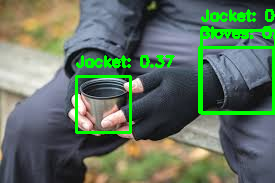

In [ ]:
# Process and visualize results
for result in results:
    boxes = result.boxes.xyxy  # get boxes coordinates in xyxy format
    confidences = result.boxes.conf  # get confidence scores
    classes = result.boxes.cls  # get class IDs

    for box, confidence, cls in zip(boxes, confidences, classes):
        x1, y1, x2, y2 = map(int, box)
        label = f'{model.names[int(cls)]}: {confidence:.2f}'

        # Draw the bounding box and label on the image
        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
        cv2.putText(image, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

# Show the image
from google.colab.patches import cv2_imshow

# After drawing bounding boxes
cv2_imshow(image)

In [ ]:
# import os
# import torch
# import matplotlib.pyplot as plt
# import matplotlib.patches as patches
# from PIL import Image
# from ultralytics import YOLO

# # Define the paths
# model_path = '/content/runs/detect/train2/weights/best.pt'  # Replace with your model path
# image_path = '/content/gloves.jpeg'  # Replace with your image path


# # Load the custom YOLOv8 model
# model = YOLO(model_path)

# # Load the image
# image = Image.open(image_path)

# # Perform inference
# results = model(image)

# # Visualize results
# fig, ax = plt.subplots(1, figsize=(12, 9))

# # Display the image
# ax.imshow(image)

# # Plot each box
# for result in results:
#     boxes = result.boxes.xyxy  # Get boxes coordinates in xyxy format
#     confidences = result.boxes.conf  # Get confidence scores
#     classes = result.boxes.cls  # Get class IDs

#     for box, confidence, cls in zip(boxes, confidences, classes):
#         x1, y1, x2, y2 = map(int, box)
#         width, height = x2 - x1, y2 - y1
#         label = f'{model.names[int(cls)]}: {confidence:.2f}'

#         # Create a Rectangle patch
#         rect = patches.Rectangle((x1, y1), width, height, linewidth=2, edgecolor='r', facecolor='none')

#         # Add the patch to the Axes
#         ax.add_patch(rect)

#         # Add label
#         plt.text(x1, y1, label, fontsize=12, color='white', bbox=dict(facecolor='red', alpha=0.5))

# # Show the plot
# plt.axis('off')  # Hide axes
# plt.show()


In [ ]:
# !pip install pillow
# from PIL import Image

# # Load the image
# image_path = 'path/to/your/image.jpg'  # Replace with the path to your image
# image = Image.open(image_path)

# # Display the image
# image.show()


In [ ]:
# # import openai library
# import openai

# # Set up the OpenAI API client
# openai.api_key = ""

# # this loop will let us ask questions continuously and behave like ChatGPT
# while True:
#     # Set up the model and prompt
#     model_engine = "text-davinci-003"

#     prompt = input('Enter new prompt: ')

#     if 'exit' in prompt or 'quit' in prompt:
#         break

#     # Generate a response
#     completion = openai.Completion.create(
#         engine=model_engine,
#         prompt=prompt,
#         max_tokens=1024,
#         n=1,
#         stop=None,
#         temperature=0.5,
#     )

#     # extracting useful part of response
#     response = completion.choices[0].text

#     # printing response
#     print(response)